# Chapter 1: Probability and counting

Source: [Introduction to Probability](https://learning.oreilly.com/library/view/introduction-to-probability/9781466575578/), September 2015.

> **Def 1.2.1** (Sample space and event). The sample space $S$ of an experiment is the set of all possible outcomes of the experiment. An event $A$ is a subset of the sample space $S$, and we say that $A$ occurred if the actual outcome is in $A$.

The sample space is assumed to be clear from the problem description. If it is not, then there is no way to compute probabilities of events. Hence, the first step in solving a probability problem is to extract or derive a clear and unambiguous description of the sample space. The next step is to extract or derive a clear and unambiguous descriptions of the events in terms of the sample space.

## Models and data data types

Sample spaces and events are modelled as sets. We use Python's `set` data type to represent sets, see <https://docs.python.org/3/library/stdtypes.html#set>. Python's `set` data type defines finite sets. For now, that is enough, but when we look at problems with infinite sample spaces, another representation in Python is needed.

## Notation

Python's notation for set operations is used:

> **Set union**: `A | B` 
>
> **Set intersection**: `A & B`
>
> **Set difference**: `A - B`
>
> **Set symmetric difference**: `A ^ B`
>
> **Element of**: `e in S`
>
> **Not element of**: `e not in S`
>
> **Strict subset comparison**: `A < B` or `B > A`
>
> **Subset comparison**: `A <= B` or `B >= A`
>
> **Number of elements**: `len(A)`
>
> **Empty set**: `set()`
>
> **Singleton e**: `{e}` 

Set complement is usually written as $S^C$. It is the set of all elements that are not in $S$. In Python,  expression `U - A` is the complement of `A` if the (finite) universe `U` is the set of all elements.

> Note: there is no unary `set` operator in Python that corresponds to $\square^C$. The complement of a set is well-defined only when the universe of all elements is clear. For instance, if $A$ is a (mathematical) set of integers, then $A^C$ is the set of all integers not in $A$. As mentioned, Python's `set` datatype represents finite sets. The complement of a `A` would be all Python objects that are not in `A`. There are infinitely many of such objects. Therefore, there cannot be a set complement operation for Python's `set` datatype.

> Note: the expression `{}` is valid in Python, but it is not a set (it is a *dict*). 

In [18]:
A = {1,2,3,4,0}

In [19]:
type(A)

set

In [20]:
print(A)

{0, 1, 2, 3, 4}


In [21]:
len(set()) # number of elements in empty set

0

In [22]:
type({}) # {} is not a set

dict

## Naive definition of probability

> **Def 1.3.1** (Naive definition of probability). Let $A$ be an event for an experiment with a finite sample space $S$. The naive probability of $A$ is: $$P_{\text{naive}}(A) = \frac{|A|}{|S|}$$

The naive definition of probability assumes $S$ to be **finite** and **all elements in $S$ to be equally likely to occur**. Although these assumptions are restricting, the naive definition of probability is still a useful tool for many probability problems. Here are some more specific guidelines by which you can verify you can use the naive definition of probability.

*There is symmetry in the problem that makes each outcome equally likely.* For instance, tossing a coin is an experiment with two equally likely events to occur: *heads* or *tails*. Another example is drawing a card from a well-shuffled deck; the event to draw a card of a specific suit and rank is equally likely as the event to draw a card of another specific suit and rank.

*The outcomes are equally likely by design.* Population surveys experiments are often designed to randomly select a sub-set of the population and ask only members of the sub-set to fill out the survey. This prevents asking the complete population to fill out the survey, which is often infeasible. The random selection of the population has  to be carefully constructed, because if certain groups of the population are under or over represented in the sub-set, the survey results will be biased.

*The experiment serves as a null model by which we can assess hypotheses.* In this setting, the naive definition of probability is used to predict probabilities of certain events. At the same time, alternative hypotheses are used to compute other probabilities of the same events. The predicted probabilities are then compared to frequencies of events in observed data. If the predicted probabilities of the null hypothesis match the observed frequencies, the data cannot be taken as evidence for a specific hypothesis. However, if the predicted probabilities of the null hypothesis do not match the observed frequencies while the predicted probabilities of a specific hypothesis do, then the data is evidence for that specific hypothesis.

Counting the number of events of a simple experiment is often not too difficult. For instance, a coin toss has two possible outcomes (events) and drawing a card randomly from a well-shuffled deck has 52 possible outcomes.

Complex experiments combine several simple experiments. For example, tossing three coins or drawing two cards with replacement. Counting the number of possible events for complex experiments can be hard. Therefore, tools have been developed to make counting events of complex experiments easier.

The *multiplication rule* is the first tool we describe to count events of complex experiments.

> **Theorem 1.4.1** (Multiplication rule). Consider a complex experiment consisting of sub-experiments $A$ and $B$. Suppose that $A$ has $a$ possible outcomes, and for each of the $a$ outcomes sub-experiment $B$ has $b$ possible outcomes. Then the complex experiment has $ab$ possible outcomes.

In [23]:
# Couting the possible outcomes of tossing 3 coins
toss_coin_outcomes = 2
print(f"Outcomes of three coin tosses: {toss_coin_outcomes * toss_coin_outcomes * toss_coin_outcomes}")

Outcomes of three coin tosses: 8


In [24]:
# Counting the possible outcomes of drawing two cards with replacement
draw_card_outcomes = 52
print(f"Outcomes of drawing two cards with replacement: {draw_card_outcomes ** 2}")

Outcomes of drawing two cards with replacement: 2704


> **Example 1.4.8** (Birthday problem). There are $k$ people in a room. Assume each person’s birthday is equally likely to be any of the $365$ days of the year (we exclude February $29$), and that people’s birthdays are independent (we assume there are no twins in the room). What is the probability that two or more people in the group have the same birthday?

The event "two or more people have the same birthday" has many outcomes and is difficult to count. The complement of this event is the event "all people have a different birthday". That event is easier to count, because it is similar to drawing a certain number of cards from a deck without replacement. The cards deck is replaced by the days of the year. The first person's birthday can be on any of the $356$ days, the second person's can be on any of the remaining $365-1=364$ days, etc. For the lhe last person (person $k$), there are $365 -(k+1)$ days to choose from. The multiplication rule gives us $365 \cdot 364 \ldots 365-(k+1)$ possibilities to have $k$ different birthdays in a year. The multiplication rule also gives us the number of possible outcomes for $k$ birthdays: each birthday can be an any of the $356$ days, so there are $365^k$ possibilities.

Therefore, the probability that $k$ people have different birthdays is $P_{\text{different birthdays}} = \frac{365 \cdot 364 \ldots 365-k+1}{365^k}$

Assuming the naive definition of probability applies, we conclude that for the original probability of two or more people sharing a birthday, we get $P_{\text{at least one shared birthday}} = 1 - P_{\text{different birthdays}} = 1-\frac{365 \cdot 364 \ldots 365-k+1}{365^k}$.

In [25]:
k=3
l = list(range(365, 365-k, -1))
print(l)

[365, 364, 363]


In [26]:
from functools import reduce
from operator import mul
from fractions import Fraction

def prob_shared(k):
    '''Return the probability of at least one shared birthday in a group of $k$ people.
    '''
    if k<2:
        return 0
    if k>=365:
        return 100.0
    # Use reduce() to multiply all numbers in a number sequence.
    # the sequence [365, 364, ..., 365-k+1] is computed in Python as range(365, 365-k, -1)
    return 100.0 * (1 - (reduce(mul, range(365,365-k,-1)) / (365**k)))

Let's plot the probability $P_{\text{shared birthdays}}$ for all values of $k$. It is sufficient to take $k\in \{2,\ldots,365\}$, because if there are less than $2$ people, there cannot be 2 people sharing a birthday so $P_{\text{shared birthdays}} = 0$. Similarly, if there are more than $365$ people, there have to be at least 2 people sharing a birthday so $P_{\text{shared birthdays}} = 1$.

## Plotting with Matplotlib

The plot shows the number of people ($k$) on the x-axis and the probability of a shared birthday ($P_{\text{shared birthdays}}$) on the y-axis. In addition, there shall be a clear indication where the 50% lies, because then we can easily see for which values of $k$ the probability of a shared birthday is greater than 50%. Finally, the smallest $k$ such that $P_{\text{shared birthdays}}$ is greater than 50% shall be indicated too. 

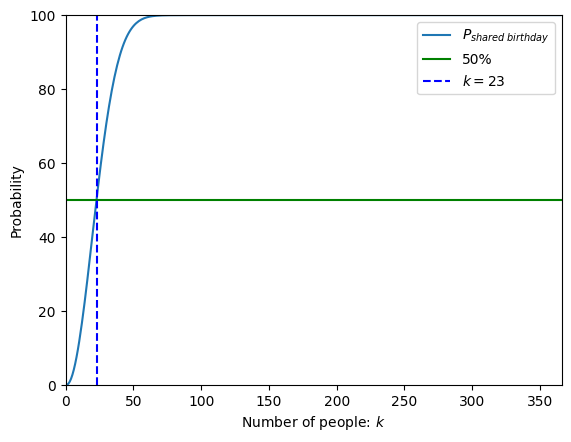

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(range(1,366), [prob_shared(k) for k in range(1,366)], label="$P_{shared\ birthday}$");  # Plot some data on the axes.
plt.axhline(50.0, color="green", label="50%")
p23 = plt.axvline(23, linestyle='--', color='blue', label="$k=23$")
plt.xlim(0,366)
plt.ylim(0, 100)
plt.xlabel("Number of people: $k$")
plt.ylabel("Probability")
plt.legend()

## Plotting with Bokey

We make the same plot with Bokeh, but add an interactive slider below the picture. Changing the slider changes the current number of people $k$). A red circle indicates the probability of a shared birthday for the current number of people. 

In [28]:
from bokeh.plotting import figure
from bokeh.layouts import layout, column
from bokeh.models import ColumnDataSource, CustomJS, Label, Legend, LegendItem, RangeSlider, Slider, Span
from bokeh.io import show, output_notebook
output_notebook()

Loading BokehJS ...

In [29]:
def bkapp(doc):
    min_days = 1
    max_days = 365
    circle_width = 15
    xs = list(range(min_days,max_days+1))
    ys = [prob_shared(x) for x in xs]
    mid50 = [50 for _ in xs]
    source = ColumnDataSource(data=dict(x=xs, y=ys, m=mid50))
    k_value = ColumnDataSource(data=dict(x=[min_days], y=[ys[min_days]]))    
    
    p = figure(title="Same Birthday Probability", 
               x_axis_label=r'Number of people (k)', 
               y_axis_label=r'Probability',
               x_range=(min_days,max_days+1),
               y_range=(0,100),
               aspect_ratio = 2/1, # width / height
              )
    pline = p.line('x', 'y', source=source, 
                   legend_label=r'P same birthday',
                   line_width=2)
    hline = p.line('x', 'm', source=source, 
                   line_color='green',
                   legend_label=r'50%',
                   line_width=1)
    vline = Span(dimension="height", location=23, line_color="blue", line_dash='dotdash')
    dummy = p.line([23],[prob_shared(23)], line_color='blue', line_dash='dotdash', legend_label="k=23")
    p.add_layout(vline)
    circle = p.scatter('x', 'y', 
                      source=k_value,
                      legend_label=r'k',
                      color='red',
                      alpha=0.6,
                      size=circle_width)
    label = Label(x=100, y=80, text=f"P({min_days}) = {prob_shared(min_days):4.2f}")
    p.add_layout(label)
    
    def callback(attr, old, new):
        nonlocal label
        if (new != old):
            k_value.data['x'] = [new]
            k_value.data['y'] = [prob_shared(new)]
            label.update(text=f"P({new}) = {prob_shared(new):4.2f}")
                
    slider = Slider(start=min_days, end=max_days, value=min_days, step=1, title="k value")
    slider.on_change('value', callback)

    doc.add_root(column(p, slider))

In [30]:
show(bkapp)

In [31]:
help(show)

Help on function show in module bokeh.io.showing:

show(obj: 'UIElement | Application | ModifyDoc', browser: 'str | None' = None, new: 'BrowserTarget' = 'tab', notebook_handle: 'bool' = False, notebook_url: 'str | ProxyUrlFunc' = 'localhost:8888', **kwargs: 'Any') -> 'CommsHandle | None'
    Immediately display a Bokeh object or application.
    
    :func:`show` may be called multiple times in a single Jupyter notebook
    cell to display multiple objects. The objects are displayed in order.
    
    Args:
        obj (UIElement or Application or callable) :
            A Bokeh object to display.
    
            Bokeh plots, widgets, layouts (i.e. rows and columns) may be
            passed to ``show`` in order to display them. If |output_file|
            has been called, the output will be saved to an HTML file, which is also
            opened in a new browser window or tab. If |output_notebook|
            has been called in a Jupyter notebook, the output will be inline
         

In [14]:
prob_shared(1)

0

In [15]:
p23.get_label()

'$k=23$'

In [16]:
print(prob_shared(23))

50.72972343239854


### Labeling objects

Counting the events of a sample space can be tricky. Two events might look similar and could, therefore, be counted once instead of twice. For instance, when tossing two coins, we might reason that there are three outcomes: two heads, two tails, and a head and a tail. This is incorrect, because there are two ways to throw a head and a tail with two coins. Labeling the coins helps describing the two ways. If we label the coins $A$ and $B$, then both $A=\text{head}$, $B=\text{tail}$ and $A=\text{tail}$, $B=\text{head}$ establish the event "a head and a tail". It is clear that these outcomes are not the same and, indeed, there are four possible outcomes for tossing two coins.

> **Example 1.4.10** (Leibniz’s mistake). If we roll two fair dice, which is more likely: a sum of 11 or a sum of 12?

Let's call the dice $A$ and $B$. To add up to $11$, there are two possibilities: $A=5$, $B=6$ and $A=6$, $B=5$. To add up to $12$, there is only one possibility: $A=B=6$. Suppose the total number of outcomes for rolling two dice is $N$. Then the (naive) probability of a sum of $11$ is $\frac{2}{N}$ and the probability of a sum of $12$ is $\frac{1}{N}$. Therefore, the probability of a sum of $11$ is twice as high as the probability of a sum of $11$.

If we want to compute the numeric value of the probabilities, we need to know the value of $N$, the number of possible outcomes. One dice has $6$ possible outcomes and each outcome is equally likely. So, using the multiplication rule we find that there are $36$ possible outcomes. Consequently, the probability of a sum of $11$ is $\frac{2}{36}$ and the probability of a sum of $12$ is $\frac{1}{36}$.

This example is called Leibniz's mistake, because he reasoned that the probabilities of a sum of $11$ and of a sum of $12$ had to be equal. He claimed that a sum of $11$ can only be achieved by rolling a $5$ and a $6$ and, "therefore" there is only one posible outcome. Rolling two dice with a sum of $12$ can only be achieved if both are a $6$ and therefore also here there is only one possible outcome. Therefore, the possibilities for these events should be the same. The mistake is that he did not distiguish the outcome $A=5,B=6$ from the outcome $A=6,B=5$. 

In [17]:
# Experimental computation of sum 11 and sum 12 probabilities.
from random import randint

# perform several simulations each with a different number, K, of samples.
for K in [100, 200, 500, 1000, 1500, 2000, 5000, 10000]:
    samples = [(randint(1,6), randint(1,6)) for _ in range(K)]
    num_sum_11 = len([e for e in samples if e[0] + e[1] == 11])
    num_sum_12 = len([e for e in samples if e[0] + e[1] == 12])
    print(f"number of samples: {K}")
    print(f"    number 11-sums: {num_sum_11}, number 12-sums: {num_sum_12}")
    print(f"    frequency 11-sums: {num_sum_11/K}, frequency 12-sums: {num_sum_12/K}")

number of samples: 100
    number 11-sums: 10, number 12-sums: 3
    frequency 11-sums: 0.1, frequency 12-sums: 0.03
number of samples: 200
    number 11-sums: 3, number 12-sums: 3
    frequency 11-sums: 0.015, frequency 12-sums: 0.015
number of samples: 500
    number 11-sums: 27, number 12-sums: 12
    frequency 11-sums: 0.054, frequency 12-sums: 0.024
number of samples: 1000
    number 11-sums: 44, number 12-sums: 29
    frequency 11-sums: 0.044, frequency 12-sums: 0.029
number of samples: 1500
    number 11-sums: 88, number 12-sums: 42
    frequency 11-sums: 0.058666666666666666, frequency 12-sums: 0.028
number of samples: 2000
    number 11-sums: 122, number 12-sums: 64
    frequency 11-sums: 0.061, frequency 12-sums: 0.032
number of samples: 5000
    number 11-sums: 263, number 12-sums: 121
    frequency 11-sums: 0.0526, frequency 12-sums: 0.0242
number of samples: 10000
    number 11-sums: 560, number 12-sums: 281
    frequency 11-sums: 0.056, frequency 12-sums: 0.0281
